In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception, preprocess_input as xception_preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Average
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
train_data_dir = '/content/drive/MyDrive/dogdataset/train1'
validation_data_dir = '/content/drive/MyDrive/dogdataset/validation1'

In [ ]:
img_width, img_height = 299, 299
batch_size = 32
num_classes = 120

In [ ]:
total_training_samples = 18614
total_validation_samples = 2123

In [ ]:
steps_per_epoch = total_training_samples // batch_size
validation_steps = total_validation_samples // batch_size

In [ ]:
train_datagen = image.ImageDataGenerator(preprocessing_function=xception_preprocess_input)
validation_datagen = image.ImageDataGenerator(preprocessing_function=xception_preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Set to 'categorical' to use one-hot encoding for labels
    shuffle=True
)

Found 18614 images belonging to 120 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2123 images belonging to 120 classes.


In [ ]:
base_xception = Xception(weights='imagenet', include_top=False)


83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in base_xception.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(base_xception.output)
x = Dense(1000,activation='relu')(x)
prediction = Dense(num_classes,activation='softmax')(x)
xception_model = Model(inputs = base_xception.input, outputs = prediction)

In [ ]:
xception_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
xception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/XceptionEpochV1/xception_model_epoch_v1{epoch:02d}.h5', save_best_only=False)

In [ ]:
xception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[xception_checkpoint])

Epoch 1/10
581/581 [==============================] - ETA: 0s - loss: 0.9586 - accuracy: 0.7704 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


581/581 [==============================] - 8460s 15s/step - loss: 0.9586 - accuracy: 0.7704 - val_loss: 0.5728 - val_accuracy: 0.8333
Epoch 2/10
581/581 [==============================] - 172s 296ms/step - loss: 0.4196 - accuracy: 0.8696 - val_loss: 0.5695 - val_accuracy: 0.8542
Epoch 3/10
581/581 [==============================] - 168s 288ms/step - loss: 0.3656 - accuracy: 0.8867 - val_loss: 0.5795 - val_accuracy: 0.8438
Epoch 4/10
581/581 [==============================] - 174s 300ms/step - loss: 0.3211 - accuracy: 0.8985 - val_loss: 0.5554 - val_accuracy: 0.8480
Epoch 5/10
581/581 [==============================] - 174s 299ms/step - loss: 0.2944 - accuracy: 0.9057 - val_loss: 0.5549 - val_accuracy: 0.8456
Epoch 6/10
581/581 [==============================] - 172s 296ms/step - loss: 0.2740 - accuracy: 0.9105 - val_loss: 0.5953 - val_accuracy: 0.8480
Epoch 7/10
581/581 [==============================] - 172s 295ms/step - loss: 0.2541 - accuracy: 0.9148 - val_loss: 0.5989 - val_accurac

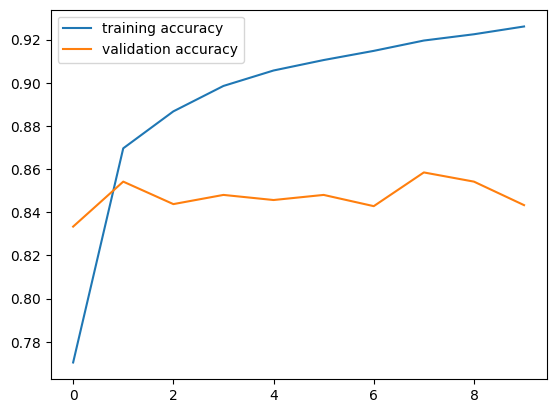

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xception_model.history.history['accuracy'],label="training accuracy")
plt.plot(xception_model.history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.show()


In [ ]:
import os

In [ ]:
xception_checkpoint_path = '/content/drive/MyDrive/XceptionEpochV1/xception_model_epoch_v110.h5'
if os.path.exists(xception_checkpoint_path):
    xception_model.load_weights(xception_checkpoint_path)

In [ ]:
xception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/XceptionEpochV2/xception_model_epoch_v2{epoch:02d}.h5', save_best_only=False)

In [ ]:
xception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[xception_checkpoint])

Epoch 1/10
581/581 [==============================] - ETA: 0s - loss: 0.1967 - accuracy: 0.9311

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


581/581 [==============================] - 175s 301ms/step - loss: 0.1967 - accuracy: 0.9311 - val_loss: 0.6220 - val_accuracy: 0.8513
Epoch 2/10
581/581 [==============================] - 171s 293ms/step - loss: 0.1869 - accuracy: 0.9322 - val_loss: 0.6553 - val_accuracy: 0.8504
Epoch 3/10
581/581 [==============================] - 176s 302ms/step - loss: 0.1787 - accuracy: 0.9375 - val_loss: 0.6880 - val_accuracy: 0.8428
Epoch 4/10
581/581 [==============================] - 178s 305ms/step - loss: 0.1682 - accuracy: 0.9405 - val_loss: 0.7061 - val_accuracy: 0.8447
Epoch 5/10
581/581 [==============================] - 170s 292ms/step - loss: 0.1610 - accuracy: 0.9424 - val_loss: 0.7326 - val_accuracy: 0.8404
Epoch 6/10
581/581 [==============================] - 176s 303ms/step - loss: 0.1561 - accuracy: 0.9450 - val_loss: 0.6909 - val_accuracy: 0.8485
Epoch 7/10
581/581 [==============================] - 178s 306ms/step - loss: 0.1491 - accuracy: 0.9461 - val_loss: 0.7295 - val_accura

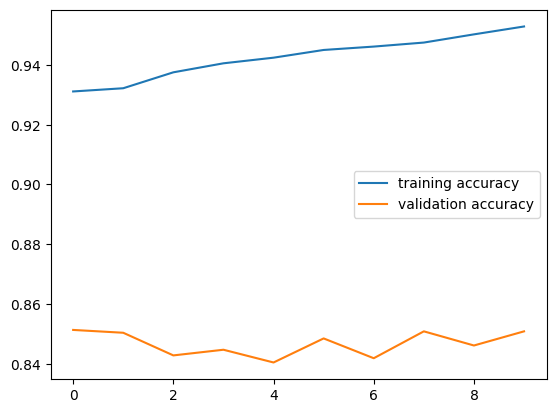

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xception_model.history.history['accuracy'],label="training accuracy")
plt.plot(xception_model.history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.show()


In [ ]:
xception_checkpoint_path = '/content/drive/MyDrive/XceptionEpochV2/inception_model_epoch_v210.h5'
if os.path.exists(xception_checkpoint_path):
    xception_model.load_weights(xception_checkpoint_path)

In [ ]:
xception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/XceptionEpochV3/xception_model_epoch_v3{epoch:02d}.h5', save_best_only=False)

In [ ]:
xception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[xception_checkpoint])

Epoch 1/10
581/581 [==============================] - ETA: 0s - loss: 0.1324 - accuracy: 0.9527

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


581/581 [==============================] - 5699s 10s/step - loss: 0.1324 - accuracy: 0.9527 - val_loss: 0.8020 - val_accuracy: 0.8527
Epoch 2/10
581/581 [==============================] - 165s 283ms/step - loss: 0.1244 - accuracy: 0.9547 - val_loss: 0.8206 - val_accuracy: 0.8494
Epoch 3/10
581/581 [==============================] - 165s 283ms/step - loss: 0.1236 - accuracy: 0.9546 - val_loss: 0.8358 - val_accuracy: 0.8485
Epoch 4/10
581/581 [==============================] - 168s 289ms/step - loss: 0.1162 - accuracy: 0.9571 - val_loss: 0.8811 - val_accuracy: 0.8494
Epoch 5/10
581/581 [==============================] - 161s 277ms/step - loss: 0.1119 - accuracy: 0.9604 - val_loss: 0.8745 - val_accuracy: 0.8518
Epoch 6/10
581/581 [==============================] - 161s 277ms/step - loss: 0.1122 - accuracy: 0.9595 - val_loss: 0.8737 - val_accuracy: 0.8404
Epoch 7/10
581/581 [==============================] - 166s 285ms/step - loss: 0.1130 - accuracy: 0.9576 - val_loss: 0.8919 - val_accurac

In [ ]:
xception_checkpoint_path = '/content/drive/MyDrive/XceptionEpochV3/xception_model_epoch_v310.h5'
if os.path.exists(xception_checkpoint_path):
    xception_model.load_weights(xception_checkpoint_path)

In [ ]:
xception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/XceptionEpochV4/xception_model_epoch_v4{epoch:02d}.h5', save_best_only=False)

In [ ]:
xception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[xception_checkpoint])

Epoch 1/10
581/581 [==============================] - ETA: 0s - loss: 0.1019 - accuracy: 0.9637 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


581/581 [==============================] - 8522s 15s/step - loss: 0.1019 - accuracy: 0.9637 - val_loss: 0.9967 - val_accuracy: 0.8471
Epoch 2/10
581/581 [==============================] - 170s 292ms/step - loss: 0.0877 - accuracy: 0.9681 - val_loss: 1.0475 - val_accuracy: 0.8438
Epoch 3/10
581/581 [==============================] - 168s 288ms/step - loss: 0.0900 - accuracy: 0.9684 - val_loss: 0.9761 - val_accuracy: 0.8485
Epoch 4/10
581/581 [==============================] - 170s 292ms/step - loss: 0.0906 - accuracy: 0.9663 - val_loss: 1.0359 - val_accuracy: 0.8518
Epoch 5/10
581/581 [==============================] - 171s 295ms/step - loss: 0.0934 - accuracy: 0.9675 - val_loss: 0.9768 - val_accuracy: 0.8433
Epoch 6/10
581/581 [==============================] - 170s 293ms/step - loss: 0.0879 - accuracy: 0.9673 - val_loss: 1.0631 - val_accuracy: 0.8490
Epoch 7/10
581/581 [==============================] - 169s 291ms/step - loss: 0.0885 - accuracy: 0.9687 - val_loss: 1.0636 - val_accurac

In [ ]:
from tensorflow.keras.models import load_model
xception = load_model('/content/drive/MyDrive/XceptionEpochV1/xception_model_epoch_v102.h5')


In [ ]:
results = xception.evaluate(validation_generator)


67/67 [==============================] - 1000s 15s/step - loss: 0.5666 - accuracy: 0.8549


In [ ]:
accuracy = results[1] * 100
print(f'Model Accuracy on Validation Set: {accuracy:.2f}%')

Model Accuracy on Validation Set: 85.49%
